<a href="https://colab.research.google.com/github/xyluo25/Traffic-Flow-Fundamental-Diagram/blob/fd_dev/FD_Calibration_Traffic_models/fundamental_diagram_calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Fundamental Diagram Calibration<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Import-Python-packages-required-for-this-project" data-toc-modified-id="Import-Python-packages-required-for-this-project-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Python packages required for this project</a></span></li><li><span><a href="#Classes-and-functions-for-fundamental-diagram-calibration" data-toc-modified-id="Classes-and-functions-for-fundamental-diagram-calibration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Classes and functions for fundamental diagram calibration</a></span><ul class="toc-item"><li><span><a href="#Function-of-computing-CPU-running-time" data-toc-modified-id="Function-of-computing-CPU-running-time-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Function of computing CPU running time</a></span></li><li><span><a href="#Fundamental-Diagram-Model" data-toc-modified-id="Fundamental-Diagram-Model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fundamental Diagram Model</a></span></li><li><span><a href="#Performing-Estimatation" data-toc-modified-id="Performing-Estimatation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Performing Estimatation</a></span></li><li><span><a href="#Calculate-Theoretical-Value" data-toc-modified-id="Calculate-Theoretical-Value-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Calculate Theoretical Value</a></span></li><li><span><a href="#Estimation-performance-calculation:-Root-Mean-Square-Error(RMSE)" data-toc-modified-id="Estimation-performance-calculation:-Root-Mean-Square-Error(RMSE)-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Estimation performance calculation: Root Mean Square Error(RMSE)</a></span></li><li><span><a href="#Fundamental-Diagram-Calibration-Solver" data-toc-modified-id="Fundamental-Diagram-Calibration-Solver-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Fundamental Diagram Calibration Solver</a></span></li></ul></li><li><span><a href="#Perform-calibration-process-step-by-step" data-toc-modified-id="Perform-calibration-process-step-by-step-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Perform calibration process step by step</a></span><ul class="toc-item"><li><span><a href="#Step-1:-Specify-the-input-data-path" data-toc-modified-id="Step-1:-Specify-the-input-data-path-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Step 1: Specify the input data path</a></span></li><li><span><a href="#Step-2:-Read-your-input-data" data-toc-modified-id="Step-2:-Read-your-input-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Step 2: Read your input data</a></span><ul class="toc-item"><li><span><a href="#Step-2.1-check-if-required-columns-in-the-dataframe" data-toc-modified-id="Step-2.1-check-if-required-columns-in-the-dataframe-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Step 2.1 check if required columns in the dataframe</a></span></li></ul></li><li><span><a href="#Step-3:-Obtain-flow,-density-and-speed-measurements-accordingly" data-toc-modified-id="Step-3:-Obtain-flow,-density-and-speed-measurements-accordingly-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Step 3: Obtain flow, density and speed measurements accordingly</a></span></li><li><span><a href="#Step-4:-Prepare-initial-values-for-solving-estimation-problem-using-solver" data-toc-modified-id="Step-4:-Prepare-initial-values-for-solving-estimation-problem-using-solver-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Step 4: Prepare initial values for solving estimation problem using solver</a></span></li><li><span><a href="#Step-5:-Initialize-FD-Solver" data-toc-modified-id="Step-5:-Initialize-FD-Solver-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Step 5: Initialize FD Solver</a></span></li><li><span><a href="#Step-6:-obtain-solutions-including-estimated-values-and-RMSE-measurement" data-toc-modified-id="Step-6:-obtain-solutions-including-estimated-values-and-RMSE-measurement-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Step 6: obtain solutions including estimated values and RMSE measurement</a></span></li><li><span><a href="#Step-7:-Plot-calibration-results" data-toc-modified-id="Step-7:-Plot-calibration-results-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Step 7: Plot calibration results</a></span></li></ul></li></ul></div>

# Description 

[Fundamental diagram of traffic flow](https://en.wikipedia.org/wiki/Fundamental_diagram_of_traffic_flow)

The **fundamental diagram** of traffic flow is a diagram that gives a relation between road traffic flux (vehicles/hour) and the traffic density (vehicles/km). A macroscopic traffic model involving traffic flux, traffic density and velocity forms the basis of the fundamental diagram. It can be used to predict the capability of a road system, or its behaviour when applying inflow regulation or speed limits.

# Import Python packages required for this project

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import os
from scipy.optimize import minimize, Bounds
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Settings for matplotlib
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rc('font', family='Times New Roman')
plt.rcParams['mathtext.fontset'] = 'stix'

#  Classes and functions for fundamental diagram calibration

## Function of computing CPU running time

In [3]:
def func_running_time(func):
    def inner(*args, **kwargs):
        print(f'INFO Begin to run function: {func.__name__} …')
        time_start = datetime.now()
        res = func(*args, **kwargs)
        time_diff = datetime.now() - time_start
        print(
            f'INFO Finished running function: {func.__name__}, total: {time_diff.seconds}s')
        print()
        return res
    return inner

## Fundamental Diagram Model

In [4]:
class FundamentalDiagramModel:

    def S3(self, beta, *args):
        vf, kc, foc = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf/np.power(1 + np.power((observed_density/kc), foc), 2/foc)
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2))
        return f_obj

    def Greenshields(self, beta, *args):
        vf, k_jam = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*(1 - observed_density/k_jam)
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2))
        return f_obj

    def Greenberg(self, beta, *args):
        vc, k_jam = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vc*np.log(k_jam/observed_density)
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2))
        return f_obj

    def Underwood(self, beta, *args):
        vf, kc = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*np.exp(-1*observed_density/kc)
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2))
        return f_obj

    def NF(self, beta, *args):
        vf, k_jam, lambda_NF = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*(1-np.exp(-1*lambda_NF/vf*(1/observed_density - 1/k_jam)))
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2))
        return f_obj

    def GHR_M1(self, beta, *args):
        vf, kc = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*np.exp(-0.5*np.power(observed_density/kc, 2))
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2))
        return f_obj

    def GHR_M2(self, beta, *args):
        vf, k_jam, m = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*(1 - np.power(observed_density/k_jam, m))
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2))
        return f_obj

    def GHR_M3(self, beta, *args):
        vf, k_jam, m = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*np.power(1 - observed_density/k_jam, m)
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2))
        return f_obj

    def KK(self, beta, *args):
        vf, kc, c1, c2, c3 = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*(1/(1 + np.exp((observed_density/kc - c1)/c2)) - c3)
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2))
        return f_obj

    def Jayakrishnan(self, beta, *args):
        vf, v_jam, k_jam, m = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = v_jam + (vf - v_jam)*np.power(1 - observed_density/k_jam, m)
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2))
        return f_obj

    def Van_Aerde(self, beta, *args):
        vf, vc, k_jam, max_flow = beta
        c1 = vf/(k_jam*np.power(vc, 2))*(2*vc - vf)
        c2 = vf/(k_jam*np.power(vc, 2))*np.power(vf - vc, 2)
        c3 = 1/max_flow - vf/(k_jam*np.power(vc, 2))
        observed_flow, observed_density, observed_speed = args
        estimated_density = 1/(c1 + c2/(vf-observed_speed) + c3*observed_speed)
        f_obj = np.sum(np.power(estimated_density - observed_density, 2))
        return f_obj

    def MacNicholas(self, beta, *args):
        vf, k_jam, m, c = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*(np.power(k_jam, m) - np.power(observed_density, m))/(np.power(k_jam, m) + c*np.power(observed_density, m))
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2))
        return f_obj

    def Wang_3PL(self, beta, *args):
        vf, kc, theta = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf/(1+np.exp((observed_density-kc)/theta))
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2))
        return f_obj

    def Wang_4PL(self, beta, *args):
        vf, vb, kc, theta = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vb + (vf-vb)/(1+np.exp((observed_density-kc)/theta))
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2))
        return f_obj

    def Wang_5PL(self, beta, *args):
        vf, vb, kc, theta1, theta2 = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vb + (vf-vb)/np.power(1+np.exp((observed_density-kc)/theta1), theta2)
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2))
        return f_obj

    def Ni(self, beta, *args):
        vf, gamma, tao, l = beta
        observed_flow, observed_density, observed_speed = args
        estimated_density = 1/((gamma*np.power(observed_speed,2)+tao*observed_speed+l)*(1-np.log(1-observed_speed/vf)))
        f_obj = np.sum(np.power(estimated_density - observed_density, 2))
        return f_obj

    def S3_joint_estimation(self, beta, *args):
        vf, kc, foc = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf/np.power(1 + np.power((observed_density/kc), foc), 2/foc)
        estimated_flow = estimated_speed * observed_density
        sigma = np.var(observed_speed) / np.var(observed_flow)
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2) + sigma * np.power(estimated_flow - observed_flow, 2))
        return f_obj

    def Greenshields_joint_estimation(self, beta, *args):
        vf, k_jam = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*(1 - observed_density/k_jam)
        estimated_flow = estimated_speed * observed_density
        sigma = np.var(observed_speed) / np.var(observed_flow)
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2) + sigma * np.power(estimated_flow - observed_flow, 2))
        return f_obj

    def Greenberg_joint_estimation(self, beta, *args):
        vc, k_jam = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vc*np.log(k_jam/observed_density)
        estimated_flow = estimated_speed * observed_density
        sigma = np.var(observed_speed) / np.var(observed_flow)
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2) + sigma * np.power(estimated_flow - observed_flow, 2))
        return f_obj

    def Underwood_joint_estimation(self, beta, *args):
        vf, kc = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*np.exp(-1*observed_density/kc)
        estimated_flow = estimated_speed * observed_density
        sigma = np.var(observed_speed) / np.var(observed_flow)
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2) + sigma * np.power(estimated_flow - observed_flow, 2))
        return f_obj

    def NF_joint_estimation(self, beta, *args):
        vf, k_jam, lambda_NF = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*(1-np.exp(-1*lambda_NF/vf*(1/observed_density - 1/k_jam)))
        estimated_flow = estimated_speed * observed_density
        sigma = np.var(observed_speed) / np.var(observed_flow)
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2) + sigma * np.power(estimated_flow - observed_flow, 2))
        return f_obj

    def GHR_M1_joint_estimation(self, beta, *args):
        vf, kc = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*np.exp(-0.5*np.power(observed_density/kc, 2))
        estimated_flow = estimated_speed * observed_density
        sigma = np.var(observed_speed) / np.var(observed_flow)
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2) + sigma * np.power(estimated_flow - observed_flow, 2))
        return f_obj

    def GHR_M2_joint_estimation(self, beta, *args):
        vf, k_jam, m = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*(1 - np.power(observed_density/k_jam, m))
        estimated_flow = estimated_speed * observed_density
        sigma = np.var(observed_speed) / np.var(observed_flow)
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2) + sigma * np.power(estimated_flow - observed_flow, 2))
        return f_obj

    def GHR_M3_joint_estimation(self, beta, *args):
        vf, k_jam, m = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*np.power(1 - observed_density/k_jam, m)
        estimated_flow = estimated_speed * observed_density
        sigma = np.var(observed_speed) / np.var(observed_flow)
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2) + sigma * np.power(estimated_flow - observed_flow, 2))
        return f_obj

    def KK_joint_estimation(self, beta, *args):
        vf, kc, c1, c2, c3 = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*(1/(1 + np.exp((observed_density/kc - c1)/c2)) - c3)
        estimated_flow = estimated_speed * observed_density
        sigma = np.var(observed_speed) / np.var(observed_flow)
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2) + sigma * np.power(estimated_flow - observed_flow, 2))
        return f_obj

    def Jayakrishnan_joint_estimation(self, beta, *args):
        vf, v_jam, k_jam, m = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = v_jam + (vf - v_jam)*np.power(1 - observed_density/k_jam, m)
        estimated_flow = estimated_speed * observed_density
        sigma = np.var(observed_speed) / np.var(observed_flow)
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2) + sigma * np.power(estimated_flow - observed_flow, 2))
        return f_obj

    def Van_Aerde_joint_estimation(self, beta, *args):
        vf, vc, k_jam, max_flow = beta
        c1 = vf/(k_jam*np.power(vc, 2))*(2*vc - vf)
        c2 = vf/(k_jam*np.power(vc, 2))*np.power(vf - vc, 2)
        c3 = 1/max_flow - vf/(k_jam*np.power(vc, 2))
        observed_flow, observed_density, observed_speed = args
        estimated_density = 1/(c1 + c2/(vf-observed_speed) + c3*observed_speed)
        estimated_flow = observed_speed * estimated_density
        sigma = np.var(observed_density) / np.var(observed_flow)
        f_obj = np.sum(np.power(estimated_density - observed_density, 2) + sigma * np.power(estimated_flow - observed_flow, 2))
        return f_obj

    def MacNicholas_joint_estimation(self, beta, *args):
        vf, k_jam, m, c = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*(np.power(k_jam, m) - np.power(observed_density, m))/(np.power(k_jam, m) + c*np.power(observed_density, m))
        estimated_flow = estimated_speed * observed_density
        sigma = np.var(observed_speed) / np.var(observed_flow)
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2) + sigma * np.power(estimated_flow - observed_flow, 2))
        return f_obj

    def Wang_3PL_joint_estimation(self, beta, *args):
        vf, kc, theta = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf/(1+np.exp((observed_density-kc)/theta))
        estimated_flow = estimated_speed * observed_density
        sigma = np.var(observed_speed) / np.var(observed_flow)
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2) + sigma * np.power(estimated_flow - observed_flow, 2))
        return f_obj

    def Wang_4PL_joint_estimation(self, beta, *args):
        vf, vb, kc, theta = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vb + (vf-vb)/(1+np.exp((observed_density-kc)/theta))
        estimated_flow = estimated_speed * observed_density
        sigma = np.var(observed_speed) / np.var(observed_flow)
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2) + sigma * np.power(estimated_flow - observed_flow, 2))
        return f_obj

    def Wang_5PL_joint_estimation(self, beta, *args):
        vf, vb, kc, theta1, theta2 = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vb + (vf-vb)/np.power(1+np.exp((observed_density-kc)/theta1), theta2)
        estimated_flow = estimated_speed * observed_density
        sigma = np.var(observed_speed) / np.var(observed_flow)
        f_obj = np.sum(np.power(estimated_speed - observed_speed, 2) + sigma * np.power(estimated_flow - observed_flow, 2))
        return f_obj

    def Ni_joint_estimation(self, beta, *args):
        vf, gamma, tao, l = beta
        observed_flow, observed_density, observed_speed = args
        estimated_density = 1/((gamma*np.power(observed_speed,2)+tao*observed_speed+l)*(1-np.log(1-observed_speed/vf)))
        estimated_flow = observed_speed * estimated_density
        sigma = np.var(observed_density) / np.var(observed_flow)
        f_obj = np.sum(np.power(estimated_density - observed_density, 2) + sigma * np.power(estimated_flow - observed_flow, 2))
        return f_obj

    def fundamental_diagram_func_dict(self):
        return {
            "S3":self.S3,
            "Greenshields":self.Greenshields,
            "Greenberg":self.Greenberg,
            "Underwood":self.Underwood,
            "NF":self.NF,
            "GHR_M1":self.GHR_M1,
            "GHR_M2":self.GHR_M2,
            "GHR_M3":self.GHR_M3,
            "KK":self.KK,
            "Jayakrishnan":self.Jayakrishnan,
            "Van_Aerde":self.Van_Aerde,
            "MacNicholas":self.MacNicholas,
            "Wang_3PL":self.Wang_3PL,
            "Wang_4PL":self.Wang_4PL,
            "Wang_5PL":self.Wang_5PL,
            "Ni":self.Ni,
            "S3_joint_estimation":self.S3_joint_estimation,
            "Greenshields_joint_estimation":self.Greenshields_joint_estimation,
            "Greenberg_joint_estimation":self.Greenberg_joint_estimation,
            "Underwood_joint_estimation":self.Underwood_joint_estimation,
            "NF_joint_estimation":self.NF_joint_estimation,
            "GHR_M1_joint_estimation":self.GHR_M1_joint_estimation,
            "GHR_M2_joint_estimation":self.GHR_M2_joint_estimation,
            "GHR_M3_joint_estimation":self.GHR_M3_joint_estimation,
            "KK_joint_estimation":self.KK_joint_estimation,
            "Jayakrishnan_joint_estimation":self.Jayakrishnan_joint_estimation,
            "Van_Aerde_joint_estimation":self.Van_Aerde_joint_estimation,
            "MacNicholas_joint_estimation":self.MacNicholas_joint_estimation,
            "Wang_3PL_joint_estimation":self.Wang_3PL_joint_estimation,
            "Wang_4PL_joint_estimation":self.Wang_4PL_joint_estimation,
            "Wang_5PL_joint_estimation":self.Wang_5PL_joint_estimation,
            "Ni_joint_estimation":self.Ni_joint_estimation,
        }


## Performing Estimatation

In [5]:
class EstimatedValue:

    def S3(self, beta, *args):
        vf, kc, foc = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf/np.power(1 + np.power((observed_density/kc), foc), 2/foc)
        estimated_flow = observed_density*vf/np.power(1 + np.power((observed_density/kc), foc), 2/foc)
        return estimated_speed, estimated_flow

    def Greenshields(self, beta, *args):
        vf, k_jam = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*(1 - observed_density/k_jam)
        estimated_flow = observed_density*vf*(1 - observed_density/k_jam)
        return estimated_speed, estimated_flow

    def Greenberg(self, beta, *args):
        vc, k_jam = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vc*np.log(k_jam/observed_density)
        estimated_flow = observed_density*vc*np.log(k_jam/observed_density)
        return estimated_speed, estimated_flow

    def Underwood(self, beta, *args):
        vf, kc = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*np.exp(-1*observed_density/kc)
        estimated_flow = observed_density*vf*np.exp(-1*observed_density/kc)
        return estimated_speed, estimated_flow

    def NF(self, beta, *args):
        vf, k_jam, lambda_NF = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*(1-np.exp(-1*lambda_NF/vf*(1/observed_density - 1/k_jam)))
        estimated_flow = observed_density*vf*(1-np.exp(-1*lambda_NF/vf*(1/observed_density - 1/k_jam)))
        return estimated_speed, estimated_flow

    def GHR_M1(self, beta, *args):
        vf, kc = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*np.exp(-0.5*np.power(observed_density/kc, 2))
        estimated_flow = observed_density*vf*np.exp(-0.5*np.power(observed_density/kc, 2))
        return estimated_speed, estimated_flow

    def GHR_M2(self, beta, *args):
        vf, k_jam, m = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*(1 - np.power(observed_density/k_jam, m))
        estimated_flow = observed_density*vf*(1 - np.power(observed_density/k_jam, m))
        return estimated_speed, estimated_flow

    def GHR_M3(self, beta, *args):
        vf, k_jam, m = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*np.power(1 - observed_density/k_jam, m)
        estimated_flow = observed_density*vf*np.power(1 - observed_density/k_jam, m)
        return estimated_speed, estimated_flow

    def KK(self, beta, *args):
        vf, kc, c1, c2, c3 = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*(1/(1 + np.exp((observed_density/kc - c1)/c2)) - c3)
        estimated_flow = observed_density*vf*(1/(1 + np.exp((observed_density/kc - c1)/c2)) - c3)
        return estimated_speed, estimated_flow

    def Jayakrishnan(self, beta, *args):
        vf, v_jam, k_jam, m = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = v_jam + (vf - v_jam)*np.power(1 - observed_density/k_jam, m)
        estimated_flow = observed_density*(v_jam + (vf - v_jam)*np.power(1 - observed_density/k_jam, m))
        return estimated_speed, estimated_flow

    def Van_Aerde(self, beta, *args):
        vf, vc, k_jam, max_flow = beta
        c1 = vf/(k_jam*np.power(vc, 2))*(2*vc - vf)
        c2 = vf/(k_jam*np.power(vc, 2))*np.power(vf - vc, 2)
        c3 = 1/max_flow - vf/(k_jam*np.power(vc, 2))
        observed_flow, observed_density, observed_speed = args
        estimated_density = 1/(c1 + c2/(vf-observed_speed) + c3*observed_speed)
        estimated_flow = observed_speed/(c1 + c2/(vf-observed_speed) + c3*observed_speed)
        return estimated_density, estimated_flow

    def MacNicholas(self, beta, *args):
        vf, k_jam, m, c = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*(np.power(k_jam, m) - np.power(observed_density, m))/(np.power(k_jam, m) + c*np.power(observed_density, m))
        estimated_flow = observed_density*vf*(np.power(k_jam, m) - np.power(observed_density, m))/(np.power(k_jam, m) + c*np.power(observed_density, m))
        return estimated_speed, estimated_flow

    def Wang_3PL(self, beta, *args):
        vf, kc, theta = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf/(1+np.exp((observed_density-kc)/theta))
        estimated_flow = observed_density*vf/(1+np.exp((observed_density-kc)/theta))
        return estimated_speed, estimated_flow

    def Wang_4PL(self, beta, *args):
        vf, vb, kc, theta = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vb + (vf-vb)/(1+np.exp((observed_density-kc)/theta))
        estimated_flow = observed_density*(vb + (vf-vb)/(1+np.exp((observed_density-kc)/theta)))
        return estimated_speed, estimated_flow

    def Wang_5PL(self, beta, *args):
        vf, vb, kc, theta1, theta2 = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vb + (vf-vb)/np.power(1+np.exp((observed_density-kc)/theta1), theta2)
        estimated_flow = observed_density*(vb + (vf-vb)/np.power(1+np.exp((observed_density-kc)/theta1), theta2))
        return estimated_speed, estimated_flow

    def Ni(self, beta, *args):
        vf, gamma, tao, l = beta
        observed_flow, observed_density, observed_speed = args
        estimated_density = 1/((gamma*np.power(observed_speed,2)+tao*observed_speed+l)*(1-np.log(1-observed_speed/vf)))
        estimated_flow = observed_speed/((gamma*np.power(observed_speed,2)+tao*observed_speed+l)*(1-np.log(1-observed_speed/vf)))
        return estimated_density, estimated_flow

    def S3_joint_estimation(self, beta, *args):
        vf, kc, foc = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf/np.power(1 + np.power((observed_density/kc), foc), 2/foc)
        estimated_flow = observed_density*vf/np.power(1 + np.power((observed_density/kc), foc), 2/foc)
        return estimated_speed, estimated_flow

    def Greenshields_joint_estimation(self, beta, *args):
        vf, k_jam = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*(1 - observed_density/k_jam)
        estimated_flow = observed_density*vf*(1 - observed_density/k_jam)
        return estimated_speed, estimated_flow

    def Greenberg_joint_estimation(self, beta, *args):
        vc, k_jam = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vc*np.log(k_jam/observed_density)
        estimated_flow = observed_density*vc*np.log(k_jam/observed_density)
        return estimated_speed, estimated_flow

    def Underwood_joint_estimation(self, beta, *args):
        vf, kc = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*np.exp(-1*observed_density/kc)
        estimated_flow = observed_density*vf*np.exp(-1*observed_density/kc)
        return estimated_speed, estimated_flow

    def NF_joint_estimation(self, beta, *args):
        vf, k_jam, lambda_NF = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*(1-np.exp(-1*lambda_NF/vf*(1/observed_density - 1/k_jam)))
        estimated_flow = observed_density*vf*(1-np.exp(-1*lambda_NF/vf*(1/observed_density - 1/k_jam)))
        return estimated_speed, estimated_flow

    def GHR_M1_joint_estimation(self, beta, *args):
        vf, kc = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*np.exp(-0.5*np.power(observed_density/kc, 2))
        estimated_flow = observed_density*vf*np.exp(-0.5*np.power(observed_density/kc, 2))
        return estimated_speed, estimated_flow

    def GHR_M2_joint_estimation(self, beta, *args):
        vf, k_jam, m = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*(1 - np.power(observed_density/k_jam, m))
        estimated_flow = observed_density*vf*(1 - np.power(observed_density/k_jam, m))
        return estimated_speed, estimated_flow

    def GHR_M3_joint_estimation(self, beta, *args):
        vf, k_jam, m = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*np.power(1 - observed_density/k_jam, m)
        estimated_flow = observed_density*vf*np.power(1 - observed_density/k_jam, m)
        return estimated_speed, estimated_flow

    def KK_joint_estimation(self, beta, *args):
        vf, kc, c1, c2, c3 = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*(1/(1 + np.exp((observed_density/kc - c1)/c2)) - c3)
        estimated_flow = observed_density*vf*(1/(1 + np.exp((observed_density/kc - c1)/c2)) - c3)
        return estimated_speed, estimated_flow

    def Jayakrishnan_joint_estimation(self, beta, *args):
        vf, v_jam, k_jam, m = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = v_jam + (vf - v_jam)*np.power(1 - observed_density/k_jam, m)
        estimated_flow = observed_density*(v_jam + (vf - v_jam)*np.power(1 - observed_density/k_jam, m))
        return estimated_speed, estimated_flow

    def Van_Aerde_joint_estimation(self, beta, *args):
        vf, vc, k_jam, max_flow = beta
        c1 = vf/(k_jam*np.power(vc, 2))*(2*vc - vf)
        c2 = vf/(k_jam*np.power(vc, 2))*np.power(vf - vc, 2)
        c3 = 1/max_flow - vf/(k_jam*np.power(vc, 2))
        observed_flow, observed_density, observed_speed = args
        estimated_density = 1/(c1 + c2/(vf-observed_speed) + c3*observed_speed)
        estimated_flow = observed_speed/(c1 + c2/(vf-observed_speed) + c3*observed_speed)
        return estimated_density, estimated_flow

    def MacNicholas_joint_estimation(self, beta, *args):
        vf, k_jam, m, c = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf*(np.power(k_jam, m) - np.power(observed_density, m))/(np.power(k_jam, m) + c*np.power(observed_density, m))
        estimated_flow = observed_density*vf*(np.power(k_jam, m) - np.power(observed_density, m))/(np.power(k_jam, m) + c*np.power(observed_density, m))
        return estimated_speed, estimated_flow

    def Wang_3PL_joint_estimation(self, beta, *args):
        vf, kc, theta = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vf/(1+np.exp((observed_density-kc)/theta))
        estimated_flow = observed_density*vf/(1+np.exp((observed_density-kc)/theta))
        return estimated_speed, estimated_flow

    def Wang_4PL_joint_estimation(self, beta, *args):
        vf, vb, kc, theta = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vb + (vf-vb)/(1+np.exp((observed_density-kc)/theta))
        estimated_flow = observed_density*(vb + (vf-vb)/(1+np.exp((observed_density-kc)/theta)))
        return estimated_speed, estimated_flow

    def Wang_5PL_joint_estimation(self, beta, *args):
        vf, vb, kc, theta1, theta2 = beta
        observed_flow, observed_density, observed_speed = args
        estimated_speed = vb + (vf-vb)/np.power(1+np.exp((observed_density-kc)/theta1), theta2)
        estimated_flow = observed_density*(vb + (vf-vb)/np.power(1+np.exp((observed_density-kc)/theta1), theta2))
        return estimated_speed, estimated_flow

    def Ni_joint_estimation(self, beta, *args):
        vf, gamma, tao, l = beta
        observed_flow, observed_density, observed_speed = args
        estimated_density = 1/((gamma*np.power(observed_speed,2)+tao*observed_speed+l)*(1-np.log(1-observed_speed/vf)))
        estimated_flow = observed_speed/((gamma*np.power(observed_speed,2)+tao*observed_speed+l)*(1-np.log(1-observed_speed/vf)))
        return estimated_density, estimated_flow

    def estimated_value_func_dict(self):
        return {
            "S3":self.S3,
            "Greenshields":self.Greenshields,
            "Greenberg":self.Greenberg,
            "Underwood":self.Underwood,
            "NF":self.NF,
            "GHR_M1":self.GHR_M1,
            "GHR_M2":self.GHR_M2,
            "GHR_M3":self.GHR_M3,
            "KK":self.KK,
            "Jayakrishnan":self.Jayakrishnan,
            "Van_Aerde":self.Van_Aerde,
            "MacNicholas":self.MacNicholas,
            "Wang_3PL":self.Wang_3PL,
            "Wang_4PL":self.Wang_4PL,
            "Wang_5PL":self.Wang_5PL,
            "Ni":self.Ni,
            "S3_joint_estimation":self.S3_joint_estimation,
            "Greenshields_joint_estimation":self.Greenshields_joint_estimation,
            "Greenberg_joint_estimation":self.Greenberg_joint_estimation,
            "Underwood_joint_estimation":self.Underwood_joint_estimation,
            "NF_joint_estimation":self.NF_joint_estimation,
            "GHR_M1_joint_estimation":self.GHR_M1_joint_estimation,
            "GHR_M2_joint_estimation":self.GHR_M2_joint_estimation,
            "GHR_M3_joint_estimation":self.GHR_M3_joint_estimation,
            "KK_joint_estimation":self.KK_joint_estimation,
            "Jayakrishnan_joint_estimation":self.Jayakrishnan_joint_estimation,
            "Van_Aerde_joint_estimation":self.Van_Aerde_joint_estimation,
            "MacNicholas_joint_estimation":self.MacNicholas_joint_estimation,
            "Wang_3PL_joint_estimation":self.Wang_3PL_joint_estimation,
            "Wang_4PL_joint_estimation":self.Wang_4PL_joint_estimation,
            "Wang_5PL_joint_estimation":self.Wang_5PL_joint_estimation,
            "Ni_joint_estimation":self.Ni_joint_estimation,
        }

## Perform Theoretical Value

In [6]:
class TheoreticalValue:

    def S3(self, beta, density):
        vf, kc, foc = beta
        theoretical_speed = vf/np.power(1 + np.power((density/kc), foc), 2/foc)
        theoretical_flow = density*vf/np.power(1 + np.power((density/kc), foc), 2/foc)
        return theoretical_speed, theoretical_flow

    def Greenshields(self, beta, density):
        vf, k_jam = beta
        theoretical_speed = vf*(1 - density/k_jam)
        theoretical_flow = density*vf*(1 - density/k_jam)
        return theoretical_speed, theoretical_flow

    def Greenberg(self, beta, density):
        vc, k_jam = beta
        theoretical_speed = vc*np.log(k_jam/density)
        theoretical_flow = density*vc*np.log(k_jam/density)
        return theoretical_speed, theoretical_flow

    def Underwood(self, beta, density):
        vf, kc = beta
        theoretical_speed = vf*np.exp(-1*density/kc)
        theoretical_flow = density*vf*np.exp(-1*density/kc)
        return theoretical_speed, theoretical_flow

    def NF(self, beta, density):
        vf, k_jam, lambda_NF = beta
        theoretical_speed = vf*(1-np.exp(-1*lambda_NF/vf*(1/density - 1/k_jam)))
        theoretical_flow = density*vf*(1-np.exp(-1*lambda_NF/vf*(1/density - 1/k_jam)))
        return theoretical_speed, theoretical_flow

    def GHR_M1(self, beta, density):
        vf, kc = beta
        theoretical_speed = vf*np.exp(-0.5*np.power(density/kc, 2))
        theoretical_flow = density*vf*np.exp(-0.5*np.power(density/kc, 2))
        return theoretical_speed, theoretical_flow

    def GHR_M2(self, beta, density):
        vf, k_jam, m = beta
        theoretical_speed = vf*(1 - np.power(density/k_jam, m))
        theoretical_flow = density*vf*(1 - np.power(density/k_jam, m))
        return theoretical_speed, theoretical_flow

    def GHR_M3(self, beta, density):
        vf, k_jam, m = beta
        theoretical_speed = vf*np.sign(1-density/k_jam)*np.abs(1-density/k_jam)**m
        theoretical_flow = density*vf*np.sign(1-density/k_jam)*np.abs(1-density/k_jam)**m
        return theoretical_speed, theoretical_flow

    def KK(self, beta, density):
        vf, kc, c1, c2, c3 = beta
        theoretical_speed = vf*(1/(1 + np.exp((density/kc - c1)/c2)) - c3)
        theoretical_flow = density*vf*(1/(1 + np.exp((density/kc - c1)/c2)) - c3)
        return theoretical_speed, theoretical_flow

    def Jayakrishnan(self, beta, density):
        vf, v_jam, k_jam, m = beta
        theoretical_speed = v_jam + (vf - v_jam)*np.sign(1-density/k_jam)*np.abs(1-density/k_jam)**m
        theoretical_flow = density*(v_jam + (vf - v_jam)*(np.sign(1-density/k_jam)*np.abs(1-density/k_jam)**m))
        return theoretical_speed, theoretical_flow

    def Van_Aerde(self, beta, speed):
        vf, vc, k_jam, max_flow = beta
        c1 = vf/(k_jam*np.power(vc, 2))*(2*vc - vf)
        c2 = vf/(k_jam*np.power(vc, 2))*np.power(vf - vc, 2)
        c3 = 1/max_flow - vf/(k_jam*np.power(vc, 2))
        theoretical_density = 1/(c1 + c2/(vf-speed) + c3*speed)
        theoretical_flow = speed/(c1 + c2/(vf-speed) + c3*speed)
        return theoretical_density, theoretical_flow

    def MacNicholas(self, beta, density):
        vf, k_jam, m, c = beta
        theoretical_speed = vf*(np.power(k_jam, m) - np.power(density, m))/(np.power(k_jam, m) + c*np.power(density, m))
        theoretical_flow = density*vf*(np.power(k_jam, m) - np.power(density, m))/(np.power(k_jam, m) + c*np.power(density, m))
        return theoretical_speed, theoretical_flow

    def Wang_3PL(self, beta, density):
        vf, kc, theta = beta
        theoretical_speed = vf/(1+np.exp((density-kc)/theta))
        theoretical_flow = density*vf/(1+np.exp((density-kc)/theta))
        return theoretical_speed, theoretical_flow

    def Wang_4PL(self, beta, density):
        vf, vb, kc, theta = beta
        theoretical_speed = vb + (vf-vb)/(1+np.exp((density-kc)/theta))
        theoretical_flow = density*(vb + (vf-vb)/(1+np.exp((density-kc)/theta)))
        return theoretical_speed, theoretical_flow

    def Wang_5PL(self, beta, density):
        vf, vb, kc, theta1, theta2 = beta
        theoretical_speed = vb + (vf-vb)/np.power(1+np.exp((density-kc)/theta1), theta2)
        theoretical_flow = density*(vb + (vf-vb)/np.power(1+np.exp((density-kc)/theta1), theta2))
        return theoretical_speed, theoretical_flow

    def Ni(self, beta, speed):
        vf, gamma, tao, l = beta
        theoretical_density = 1/((gamma*np.power(speed,2)+tao*speed+l)*(1-np.log(1-speed/vf)))
        theoretical_flow = speed/((gamma*np.power(speed,2)+tao*speed+l)*(1-np.log(1-speed/vf)))
        return theoretical_density, theoretical_flow

    def S3_joint_estimation(self, beta, density):
        vf, kc, foc = beta
        theoretical_speed = vf/np.power(1 + np.power((density/kc), foc), 2/foc)
        theoretical_flow = density*vf/np.power(1 + np.power((density/kc), foc), 2/foc)
        return theoretical_speed, theoretical_flow

    def Greenshields_joint_estimation(self, beta, density):
        vf, k_jam = beta
        theoretical_speed = vf*(1 - density/k_jam)
        theoretical_flow = density*vf*(1 - density/k_jam)
        return theoretical_speed, theoretical_flow

    def Greenberg_joint_estimation(self, beta, density):
        vc, k_jam = beta
        theoretical_speed = vc*np.log(k_jam/density)
        theoretical_flow = density*vc*np.log(k_jam/density)
        return theoretical_speed, theoretical_flow

    def Underwood_joint_estimation(self, beta, density):
        vf, kc = beta
        theoretical_speed = vf*np.exp(-1*density/kc)
        theoretical_flow = density*vf*np.exp(-1*density/kc)
        return theoretical_speed, theoretical_flow

    def NF_joint_estimation(self, beta, density):
        vf, k_jam, lambda_NF = beta
        theoretical_speed = vf*(1-np.exp(-1*lambda_NF/vf*(1/density - 1/k_jam)))
        theoretical_flow = density*vf*(1-np.exp(-1*lambda_NF/vf*(1/density - 1/k_jam)))
        return theoretical_speed, theoretical_flow

    def GHR_M1_joint_estimation(self, beta, density):
        vf, kc = beta
        theoretical_speed = vf*np.exp(-0.5*np.power(density/kc, 2))
        theoretical_flow = density*vf*np.exp(-0.5*np.power(density/kc, 2))
        return theoretical_speed, theoretical_flow

    def GHR_M2_joint_estimation(self, beta, density):
        vf, k_jam, m = beta
        theoretical_speed = vf*(1 - np.power(density/k_jam, m))
        theoretical_flow = density*vf*(1 - np.power(density/k_jam, m))
        return theoretical_speed, theoretical_flow

    def GHR_M3_joint_estimation(self, beta, density):
        vf, k_jam, m = beta
        theoretical_speed = vf*np.sign(1-density/k_jam)*np.abs(1-density/k_jam)**m
        theoretical_flow = density*vf*np.sign(1-density/k_jam)*np.abs(1-density/k_jam)**m
        return theoretical_speed, theoretical_flow

    def KK_joint_estimation(self, beta, density):
        vf, kc, c1, c2, c3 = beta
        theoretical_speed = vf*(1/(1 + np.exp((density/kc - c1)/c2)) - c3)
        theoretical_flow = density*vf*(1/(1 + np.exp((density/kc - c1)/c2)) - c3)
        return theoretical_speed, theoretical_flow

    def Jayakrishnan_joint_estimation(self, beta, density):
        vf, v_jam, k_jam, m = beta
        theoretical_speed = v_jam + (vf - v_jam)*np.sign(1-density/k_jam)*np.abs(1-density/k_jam)**m
        theoretical_flow = density*(v_jam + (vf - v_jam)*(np.sign(1-density/k_jam)*np.abs(1-density/k_jam)**m))
        return theoretical_speed, theoretical_flow

    def Van_Aerde_joint_estimation(self, beta, speed):
        vf, vc, k_jam, max_flow = beta
        c1 = vf/(k_jam*np.power(vc, 2))*(2*vc - vf)
        c2 = vf/(k_jam*np.power(vc, 2))*np.power(vf - vc, 2)
        c3 = 1/max_flow - vf/(k_jam*np.power(vc, 2))
        theoretical_density = 1/(c1 + c2/(vf-speed) + c3*speed)
        theoretical_flow = speed/(c1 + c2/(vf-speed) + c3*speed)
        return theoretical_density, theoretical_flow

    def MacNicholas_joint_estimation(self, beta, density):
        vf, k_jam, m, c = beta
        theoretical_speed = vf*(np.power(k_jam, m) - np.power(density, m))/(np.power(k_jam, m) + c*np.power(density, m))
        theoretical_flow = density*vf*(np.power(k_jam, m) - np.power(density, m))/(np.power(k_jam, m) + c*np.power(density, m))
        return theoretical_speed, theoretical_flow

    def Wang_3PL_joint_estimation(self, beta, density):
        vf, kc, theta = beta
        theoretical_speed = vf/(1+np.exp((density-kc)/theta))
        theoretical_flow = density*vf/(1+np.exp((density-kc)/theta))
        return theoretical_speed, theoretical_flow

    def Wang_4PL_joint_estimation(self, beta, density):
        vf, vb, kc, theta = beta
        theoretical_speed = vb + (vf-vb)/(1+np.exp((density-kc)/theta))
        theoretical_flow = density*(vb + (vf-vb)/(1+np.exp((density-kc)/theta)))
        return theoretical_speed, theoretical_flow

    def Wang_5PL_joint_estimation(self, beta, density):
        vf, vb, kc, theta1, theta2 = beta
        theoretical_speed = vb + (vf-vb)/np.power(1+np.exp((density-kc)/theta1), theta2)
        theoretical_flow = density*(vb + (vf-vb)/np.power(1+np.exp((density-kc)/theta1), theta2))
        return theoretical_speed, theoretical_flow

    def Ni_joint_estimation(self, beta, speed):
        vf, gamma, tao, l = beta
        theoretical_density = 1/((gamma*np.power(speed,2)+tao*speed+l)*(1-np.log(1-speed/vf)))
        theoretical_flow = speed/((gamma*np.power(speed,2)+tao*speed+l)*(1-np.log(1-speed/vf)))
        return theoretical_density, theoretical_flow

    def theoretical_value_func_dict(self):
        return {
            "S3":self.S3,
            "Greenshields":self.Greenshields,
            "Greenberg":self.Greenberg,
            "Underwood":self.Underwood,
            "NF":self.NF,
            "GHR_M1":self.GHR_M1,
            "GHR_M2":self.GHR_M2,
            "GHR_M3":self.GHR_M3,
            "KK":self.KK,
            "Jayakrishnan":self.Jayakrishnan,
            "Van_Aerde":self.Van_Aerde,
            "MacNicholas":self.MacNicholas,
            "Wang_3PL":self.Wang_3PL,
            "Wang_4PL":self.Wang_4PL,
            "Wang_5PL":self.Wang_5PL,
            "Ni":self.Ni,
            "S3_joint_estimation":self.S3_joint_estimation,
            "Greenshields_joint_estimation":self.Greenshields_joint_estimation,
            "Greenberg_joint_estimation":self.Greenberg_joint_estimation,
            "Underwood_joint_estimation":self.Underwood_joint_estimation,
            "NF_joint_estimation":self.NF_joint_estimation,
            "GHR_M1_joint_estimation":self.GHR_M1_joint_estimation,
            "GHR_M2_joint_estimation":self.GHR_M2_joint_estimation,
            "GHR_M3_joint_estimation":self.GHR_M3_joint_estimation,
            "KK_joint_estimation":self.KK_joint_estimation,
            "Jayakrishnan_joint_estimation":self.Jayakrishnan_joint_estimation,
            "Van_Aerde_joint_estimation":self.Van_Aerde_joint_estimation,
            "MacNicholas_joint_estimation":self.MacNicholas_joint_estimation,
            "Wang_3PL_joint_estimation":self.Wang_3PL_joint_estimation,
            "Wang_4PL_joint_estimation":self.Wang_4PL_joint_estimation,
            "Wang_5PL_joint_estimation":self.Wang_5PL_joint_estimation,
            "Ni_joint_estimation":self.Ni_joint_estimation,
        }

## Estimation performance calculation: Root Mean Square Error(RMSE)

In [23]:
class GetMetrics:

    def __init__(self, observed_flow: np.array, observed_density: np.array, observed_speed: np.array, estimated_flow: np.array, estimated_speed: np.array):
        self.observed_flow = observed_flow
        self.observed_density = observed_density
        self.observed_speed = observed_speed
        self.estimated_flow = estimated_flow
        self.estimated_speed = estimated_speed

    def RMSE_Overall(self) -> list:
        rmse_speed = mean_squared_error(
            self.observed_speed, self.estimated_speed, squared=False)
        rmse_flow = mean_squared_error(
            self.observed_flow, self.estimated_flow, squared=False)
        r2_speed = r2_score(self.observed_speed, self.estimated_speed)
        r2_flow = r2_score(self.observed_flow, self.estimated_flow)
        return [rmse_speed, rmse_flow, r2_speed, r2_flow]

    def RMSE_Small_Range(self, interval: int = 10) -> list:
        rmse_speed_small_range = []
        rmse_flow_small_range = []
        density_max_value = min(math.ceil(max(self.observed_density) / 10), 10)
        for i in range(density_max_value):
            temp_index = np.where(
                (self.observed_density >= interval*i) & (self.observed_density < interval*(i+1)))
            observed_speed_i = self.observed_speed[temp_index]
            estimated_speed_i = self.estimated_speed[temp_index]
            observed_flow_i = self.observed_flow[temp_index]
            estimated_flow_i = self.estimated_flow[temp_index]
            try:
                rmse_speed_small_range.append(mean_squared_error(
                    observed_speed_i, estimated_speed_i, squared=False))
            except Exception:
                rmse_speed_small_range.append(0)

            try:
                rmse_flow_small_range.append(mean_squared_error(
                    observed_flow_i, estimated_flow_i, squared=False))
            except Exception:
                rmse_flow_small_range.append(0)
        observed_speed_last = self.observed_speed[np.where(
            (self.observed_density >= density_max_value))]
        estimated_speed_last = self.estimated_speed[np.where(
            (self.observed_density >= density_max_value))]
        observed_flow_last = self.observed_flow[np.where(
            (self.observed_density >= density_max_value))]
        estimated_flow_last = self.estimated_flow[np.where(
            (self.observed_density >= density_max_value))]

        try:
            rmse_speed_small_range.append(mean_squared_error(
                observed_speed_last, estimated_speed_last, squared=False))
        except Exception:
            rmse_speed_small_range.append(0)

        try:
            rmse_flow_small_range.append(mean_squared_error(
                observed_flow_last, estimated_flow_last, squared=False))
        except Exception:
            rmse_flow_small_range.append(0)

        return rmse_speed_small_range, rmse_flow_small_range

## Fundamental Diagram Calibration Solver

In [49]:
class FDCalibrateSolver:

    def __init__(self, data: pd.DataFrame, model_parameters_dict: dict = {}, **kwargs):
        """This class is used to calibrate the fundamental diagram model.

        Args:
            data (pd.DataFrame): include the flow, density, and speed data. with columns: Flow, Density, Speed.

            model_parameters_dict (dict): a dictionary of model parameters: vf, vc, kc, m, q_max
                example: model_parameters_dict = {"vf": 30, "vc": 30, "kc": 0.5, "m": 4, "q_max": 2000}
        """

        # TDD development
        if not isinstance(data, pd.DataFrame):
            raise TypeError("The data should be a pandas DataFrame.")

        if not {"flow", "density", "speed"}.issubset(data.columns):
            raise ValueError("The data should include the columns: Flow, Density, and Speed.")

        # if not specified the model parameters, then use the default values
        if not model_parameters_dict:
            model_parameters_dict = {"vf": 72.78, "vc": 45.73, "kc": 33.98, "m": 2.98, "q_max": 1554}
            print(f"Info: the default model parameters are used: {model_parameters_dict}\n")

        if not isinstance(model_parameters_dict, dict):
            raise TypeError("The model_parameters_dict should be a dictionary.")

        if not {"vf", "vc", "kc", "m", "q_max"}.issubset(model_parameters_dict.keys()):
            raise KeyError("The model_parameters_dict should at least contain vf, vc, kc, m, q_max.")

        self.speed = np.array(data.speed)
        self.density = np.array(data.density)
        self.flow = np.array(data.flow)
        self.model_parameters_dict = model_parameters_dict

        # initial functions
        self.fd_model_dict = FundamentalDiagramModel().fundamental_diagram_func_dict()
        self.estimated_value_dict = EstimatedValue().estimated_value_func_dict()
        self.theoretical_value_dict = TheoreticalValue().theoretical_value_func_dict()
        self.__init_boundary_and_x0()

        # update or add new parameters from kwargs
        if kwargs:
            {setattr(self, key, value) for key, value in kwargs.items()}

    def __create_lower_upper_bounds(self, value: float, oscillation: float = 0.4, user_defined_bound: list = []) -> list:
        return user_defined_bound or [value * (1 - oscillation), value * (1 + oscillation)]

    def __init_boundary_and_x0(self) -> None:

        # free flow speed lower and upper boundary
        lb_vf, ub_vf = self.__create_lower_upper_bounds(self.model_parameters_dict.get("vf"))

        # critical speed lower and upper boundary
        lb_vc, ub_vc = self.__create_lower_upper_bounds(self.model_parameters_dict.get("vc"))

        # give the lower and upper boundary for jam speed
        lb_vjam, ub_vjam = [0, 10]

        # critical density lower and upper boundary
        lb_kc, ub_kc = self.__create_lower_upper_bounds(self.model_parameters_dict.get("kc"))

        # flatness value lower and upper boundary
        lb_m, ub_m = self.__create_lower_upper_bounds(self.model_parameters_dict.get("m"), user_defined_bound=[0, 10])

        # get jam density from critical density and generate lower and upper boundary
        kjam_greenshields = 2 * self.model_parameters_dict["kc"]
        kjam_greenberg = math.e * self.model_parameters_dict.get("kc")
        kjam = kjam_greenshields # for models other than Greenberg and Greenshields

        lb_kjam_greenshields, ub_kjam_greenshields = self.__create_lower_upper_bounds(kjam_greenshields, user_defined_bound=[50, 70])
        lb_kjam_greenberg, ub_kjam_greenberg = self.__create_lower_upper_bounds(kjam_greenberg)
        lb_kjam, ub_kjam = self.__create_lower_upper_bounds(kjam)

        # maximum flow lower and upper boundary
        lb_q_max, ub_q_max = self.__create_lower_upper_bounds(self.model_parameters_dict.get("q_max"))

        print("Info: the lower and upper bounds are:")
        print(f" vf: {lb_vf}, {ub_vf} \n vc: {lb_vc}, {ub_vc}\n vjam: {lb_vjam}, {ub_vjam} \n kc: {lb_kc}, {ub_kc} \n m: {lb_m}, {ub_m} \n kjam: {lb_kjam}, {ub_kjam} \n kjam_greenshields: {lb_kjam_greenshields}, {ub_kjam_greenshields} \n kjam_greenberg:{lb_kjam_greenberg}, {ub_kjam_greenberg} \n q_max: {lb_q_max}, {ub_q_max}\n")

        # crate lower and upper boundary for each model
        boundary_dict = {"S3"          : ([lb_vf, lb_kc, lb_m], [ub_vf, ub_kc, ub_m]),
                         "Greenshields": ([lb_vf, lb_kjam_greenshields], [ub_vf, ub_kjam_greenshields]),
                         "Greenberg"   : ([lb_vc, lb_kjam_greenberg], [ub_vc, ub_kjam_greenberg]),
                         "Underwood"   : ([lb_vf, lb_kc], [ub_vf, ub_kc]),
                         "NF"          : ([lb_vf, lb_kjam, 0], [ub_vf, ub_kjam, 5000]),
                         "GHR_M1"      : ([lb_vf, lb_kc], [ub_vf, ub_kc]),
                         "GHR_M2"      : ([lb_vf, lb_kjam, lb_m], [ub_vf, ub_kjam, ub_m]),
                         "GHR_M3"      : ([lb_vf, lb_kjam, lb_m], [ub_vf, ub_kjam, ub_m]),
                         "KK"          : ([lb_vf, lb_kc, 0, 0, 0], [ub_vf, ub_kc, np.inf, np.inf, np.inf]),
                         "Jayakrishnan": ([lb_vf, lb_vjam, lb_kjam, lb_m], [ub_vf, ub_vjam, 200, ub_m]),
                         "Van_Aerde"   : ([lb_vf, lb_vc, lb_kjam, lb_q_max], [ub_vf, ub_vc, ub_kjam, ub_q_max]),
                         "MacNicholas" : ([lb_vf, lb_kjam, lb_m, 0], [ub_vf, ub_kjam, ub_m, np.inf]),
                         "Wang_3PL"    : ([lb_vf, lb_kc, 1], [ub_vf, ub_kc, 20]),
                         "Wang_4PL"    : ([lb_vf, lb_vjam, lb_kc, 1], [ub_vf, ub_vjam, ub_kc, 20]),
                         "Wang_5PL"    : ([lb_vf, lb_vjam, lb_kc, 1, 0], [ub_vf, ub_vjam, ub_kc, 20, 1]),
                         "Ni"          : ([lb_vf, -1, 0, 0], [ub_vf, 0, 3, 10]),
                        }

        # crate lower and upper boundary for each joint_estimation model
        boundary_joint_estimation_dict = {f"{model_name}_joint_estimation": boundary_dict[model_name] for model_name in boundary_dict}

        # final boundary dictionary
        bounds_dict = boundary_dict | boundary_joint_estimation_dict
        self.bounds = {model_name: Bounds(bounds_dict[model_name][0], bounds_dict[model_name][1]) for model_name in bounds_dict}

        # update bounds for specification test
        self.bounds["Underwood"] = Bounds([lb_vf, 25], [ub_vf, 40])

        # initial x0 for each model
        self.x0 = {model_name:[sum(lb_ub_pair)/2 for lb_ub_pair in zip(bounds_dict.get(model_name)[0], bounds_dict.get(model_name)[1])] for model_name in bounds_dict}

        # update x0 for specification test
        self.x0["KK"] = self.x0["KK"][:2] + [0.25, 0.06, 3.72e-06]
        self.x0["Jayakrishnan"] = self.x0["Jayakrishnan"][:3] + [2]
        self.x0["MacNicholas"] = self.x0["MacNicholas"][:2] + [3, 2]
        self.x0["GHR_M3"] = self.x0["GHR_M3"][:2] + [2]
        self.x0["Ni"] = self.x0["Ni"][:1] + [-3.48e-6, 1/3600, 7.5e-3]
        self.x0["Wang_4PL"] = self.x0["Wang_4PL"][:3] + [1]
        self.x0["Wang_5PL"] = self.x0["Wang_5PL"][:3] + [1, 1]

        print(f"Info: the initial x0 are: {self.x0}\n")

    def _calculate_solution_single(self, model_str: str, init_solution: dict):
        # calibration
        objective = self.fd_model_dict[model_str]
        bound = self.bounds[model_str]
        solution = minimize(objective, init_solution, args=(self.flow, self.density, self.speed), method='trust-constr', bounds=bound)

        return solution.x

    def _calculate_estimated_value_single(self, model_str: str, parameters: dict):
        if model_str in {"Van_Aerde", "Ni", "Van_Aerde_joint_estimation", "Ni_joint_estimation", "S3", "Greenshields", "Greenberg", "Underwood", "NF", "GHR_M1", "GHR_M2", "GHR_M3", "KK", "Jayakrishnan", "MacNicholas", "Wang_3PL", "Wang_4PL", "Wang_5PL", "S3_joint_estimation", "Greenshields_joint_estimation", "Greenberg_joint_estimation", "Underwood_joint_estimation", "NF_joint_estimation", "GHR_M1_joint_estimation", "GHR_M2_joint_estimation", "GHR_M3_joint_estimation", "KK_joint_estimation", "Jayakrishnan_joint_estimation", "MacNicholas_joint_estimation", "Wang_3PL_joint_estimation", "Wang_4PL_joint_estimation", "Wang_5PL_joint_estimation"}:
            # Calculate the estimated flow/speed/density based on the fundamental diagram model.
            # Based on these estimated values, we can further calculate the metrics, such as MRE, MSE, RMSE, etc.
            estimated_values_model_func = self.estimated_value_dict[model_str]
            estimated_density = estimated_values_model_func(parameters, self.flow, self.density, self.speed)[0]
            estimated_flow = estimated_values_model_func(parameters, self.flow, self.density, self.speed)[1]
            return estimated_density, estimated_flow
        else:
            raise ValueError("The model name is not correct, please re-check the model name or define the fundamental diagram model before calibration.")

    @func_running_time
    def get_solutions_dict(self, model_name_list: list = []) -> dict:

        # if not specified, calculate all models
        if not model_name_list:
            return {model_name: self._calculate_solution_single(model_name, self.x0.get(model_name)) for model_name in self.x0}

        # if specified model_name_list, model names not pre-defined, then raise error
        if model_name_list and (not set(model_name_list).issubset(self.x0.keys())):
            raise ValueError("The model name is not correct, please re-check the model name or define the fundamental diagram model before calibration.")

        # if specified the model_name_list, model names defined, then calculate the solutions from the model_name_list
        if model_name_list and set(model_name_list).issubset(self.x0.keys()):
            return {model_name: self._calculate_solution_single(model_name, self.x0.get(model_name)) for model_name in model_name_list}

    @func_running_time
    def get_estimated_value_dict(self, solution_dict: dict, model_name_list: list = []) -> dict:

        # if not specified the model_name_list, then calculate all the estimated values
        if not model_name_list:
            # get estimated flow and speed values for each model
            flow_est = {model_name: self._calculate_estimated_value_single(
                model_name, solution_dict[model_name])[1] for model_name in solution_dict}
            speed_est = {model_name: self._calculate_estimated_value_single(
                model_name, solution_dict[model_name])[0] for model_name in solution_dict}
            return {"flow_est": flow_est, "speed_est": speed_est}

        # if specified the model_name_list, model names not defined, then raise error
        if model_name_list and (not model_name_list.issubset(self.x0.keys())):
            raise ValueError("The model name is not correct, please re-check the model name or define the fundamental diagram model before calibration.")

        # if specified the model_name_list, model names defined, then calculate the estimated values for the specified model names
        if model_name_list and model_name_list.issubset(self.x0.keys()):
            # get estimated flow and speed values for each model
            flow_est = {model_name: self._calculate_estimated_value_single(model_name, solution_dict[model_name])[1] for model_name in model_name_list}
            speed_est = {model_name: self._calculate_estimated_value_single(model_name, solution_dict[model_name])[0] for model_name in model_name_list}
            return {"flow_est": flow_est, "speed_est": speed_est}

    @func_running_time
    def get_matrix_value_dict(self, estimated_dict: dict) -> dict:
        # get estimated speed and flow
        estimated_value_dict = estimated_dict
        model_names_all = list(self.x0.keys())

        # conveert observed speed, flow and density to numpy array
        flow_obs = self.flow
        density_obs = self.density
        speed_obs = self.speed

        # get rmse and r2 results
        rmse_speed_list, rmse_flow_list = [], []
        rmse_r2_overall_list = []
        for model_name in model_names_all:
            flow_est_single = np.array(estimated_value_dict["flow_est"].get(model_name))
            speed_est_single = np.array(estimated_value_dict["speed_est"].get(model_name))
            metrics = GetMetrics(flow_obs, density_obs, speed_obs, flow_est_single, speed_est_single)
            rmse_speed, rmse_flow = metrics.RMSE_Small_Range()

            rmse_speed_list.append(rmse_speed)
            rmse_flow_list.append(rmse_flow)
            try:
                rmse_r2_overall_list.append(metrics.RMSE_Overall())
            except Exception:
                rmse_r2_overall_list.append([np.nan] * 4)

        # create dataframe
        df_rmse_speed = pd.DataFrame(rmse_speed_list, index=model_names_all, columns=["RMSE_speed"]*len(rmse_speed_list[0]))
        df_rmse_flow = pd.DataFrame(rmse_flow_list, index=model_names_all, columns=["RMSE_flow"]*len(rmse_flow_list[0]))
        df_rmse_r2_overall = pd.DataFrame(rmse_r2_overall_list, index=model_names_all, columns=["RMSE_speed_overall", "RMSE_flow_overall", "r2_speed_overall", "r2_flow_overall"])

        # save dataframe to csv
        df_rmse_speed.to_csv("rmse_speed.csv")
        df_rmse_flow.to_csv("rmse_flow.csv")
        df_rmse_r2_overall.to_csv("rmse_r2_overall.csv")

        return {"speed_rmse": df_rmse_speed, "flow_rmse": df_rmse_flow, "rmse_r2_overall": df_rmse_r2_overall}

    @func_running_time
    def plot_fd(self, solution_dict: dict, model_name_list: list = [],  base_model_name: str = "S3", output_path: str = "../examples/Figures_s3"):

        # if not specified the model_name_list, then plot all the fundamental diagram (exclude the base model)
        if not model_name_list:
            model_name_list = [model_name for model_name in self.x0.keys() if model_name != base_model_name]

        # check output path exists or not
        if not os.path.exists(output_path):
            os.makedirs(output_path)

        self.k = np.linspace(0.000001, 140, 70)
        self.v = np.linspace(0.000001, 90, 70)

        # get base model theoretical flow and speed values
        theoretical_values_base = self.theoretical_value_dict[base_model_name]
        theoretical_speed_base = theoretical_values_base(solution_dict.get(base_model_name), self.k)[0]
        theoretical_flow_base = theoretical_values_base(solution_dict.get(base_model_name), self.k)[1]

        # draw plot accordingly
        for model_name in model_name_list:

            # get single model theoretical flow and speed values
            theoretical_value_single = self.theoretical_value_dict[model_name]
            theoretical_density = theoretical_value_single(solution_dict.get(model_name), self.k)[0]
            theoretical_flow = theoretical_value_single(solution_dict.get(model_name), self.k)[1]

            if model_name in ["Van_Aerde", "Ni", "Van_Aerde_joint_estimation", "Ni_joint_estimation"]:
                x1 = theoretical_density
                y1 = theoretical_flow
                x2 = theoretical_density
                y2 = self.v
                x3 = theoretical_flow
                y3 = self.v
            else:
                x1 = self.k
                y1 = theoretical_flow
                x2 = self.k
                y2 = theoretical_density
                x3 = theoretical_flow
                y3 = theoretical_density

            # print out vf and kc/kjam accordingly
            print(f"{model_name}: vf: {solution_dict.get(model_name)[0]}, kc/kjam: {solution_dict.get(model_name)[1]}")
                
            # create q-k diagram
            fig = plt.figure(figsize=(7,5))
            plt.scatter(self.density.flatten(), self.flow.flatten(), s = 3, marker='o', c='r', edgecolors='r', label = 'Observation')
            plt.plot(x1, y1, 'y-', linewidth=3, label = model_name)
            plt.plot(self.k, theoretical_flow_base, 'b--', linewidth=4, label = "S3")
            plt.plot()
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            plt.xlabel('Density (veh/km)', fontsize=16)
            plt.ylabel('Flow (veh/h)', fontsize=16)
            plt.xlim((0, 140))
            plt.ylim((0, 2250))
            plt.legend(loc='upper right', fontsize=14)
            plt.title('Flow vs. density', fontsize=20)
            fig.savefig(f"{output_path}/flow vs density_{model_name}.png", dpi=400, bbox_inches='tight')

            # create v-k diagram
            fig = plt.figure(figsize=(7,5))
            plt.scatter(self.density.flatten(), self.speed.flatten(), s = 3, marker='o', c='r', edgecolors='r', label = 'Observation')
            plt.plot(x2, y2, 'y-', linewidth=3, label = model_name)
            plt.plot(self.k, theoretical_speed_base, 'b--', linewidth=4, label = "S3")
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            plt.xlabel('Density (veh/km)', fontsize=16)
            plt.ylabel('Speed (km/h)', fontsize=16)
            plt.xlim((0, 140))
            plt.ylim((0, 90))
            plt.legend(loc='upper right', fontsize=14)
            plt.title('Speed vs. density', fontsize=20)
            fig.savefig(f"{output_path}/speed vs density_{model_name}.png", dpi=400, bbox_inches='tight')

            # create v-q diagram
            fig = plt.figure(figsize=(7,5))
            plt.scatter(self.flow.flatten(), self.speed.flatten(), s = 3, marker='o', c='r', edgecolors='r', label = 'Observation')
            plt.plot(x3, y3, 'y-', linewidth=3, label = model_name)
            plt.plot(theoretical_flow_base, theoretical_speed_base, 'b--', linewidth=4, label = "S3")
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            plt.xlabel('Flow (veh/h)', fontsize=16)
            plt.ylabel('Speed (km/h)', fontsize=16)
            plt.xlim((0,2250))
            plt.ylim((0, 90))
            plt.legend(loc='upper right', fontsize=14)
            plt.title('Speed vs. flow', fontsize=20)
            fig.savefig(f"{output_path}/speed vs flow_{model_name}.png", dpi=400, bbox_inches='tight')

        print(f"Info: Successfully saved figures in {output_path}")

    @func_running_time
    def plot_fd_combo(self, solution_dict: dict, model_name_list: list = [], output_path: str = "../examples/Figures_combo", transparency: float = 1):

        if not model_name_list:
            model_name_list = list(self.x0.keys())

        # check output path exists or not
        if not os.path.exists(output_path):
            os.makedirs(output_path)

        self.k = np.linspace(0.000001,140,70)
        self.v = np.linspace(0.000001,90,70)

        # calculate theoretical values for other models
        calibrated_result_list = []
        for model_str in model_name_list:

            theoretical_value_single = self.theoretical_value_dict[model_str]

            theoretical_density = theoretical_value_single(solution_dict.get(model_str), self.k)[0]
            theoretical_flow = theoretical_value_single(solution_dict.get(model_str), self.k)[1]

            if model_str in ["Van_Aerde", "Ni", "Van_Aerde_joint_estimation", "Ni_joint_estimation"]:
                x1 = theoretical_density
                y1 = theoretical_flow
                x2 = theoretical_density
                y2 = self.v
                x3 = theoretical_flow
                y3 = self.v
            else:
                x1 = self.k
                y1 = theoretical_flow
                x2 = self.k
                y2 = theoretical_density
                x3 = theoretical_flow
                y3 = theoretical_density

            calibrated_result_list.append([x1, y1, x2, y2, x3, y3])
        
        # print vf and kc/kjam for each model
        for model_name in model_name_list:
            print(f"{model_name}: vf: {solution_dict.get(model_name)[0]},  kc/kjam: {solution_dict.get(model_name)[1]}\n")

        fig = plt.figure(figsize=(7, 5))
        plt.scatter(self.density.flatten(), self.flow.flatten(), s=3,
                    marker='o', c='r', edgecolors='r', label='Observation')
        [plt.plot(calibrated_result_list[i][0],  calibrated_result_list[i][1], linewidth=3, label=model_name_list[i], alpha=transparency) for i in range(len(calibrated_result_list))]

        # plt.plot(self.k, theoretical_flow_S3, 'b--', linewidth=4, label="S3")
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.xlabel('Density (veh/km)', fontsize=16)
        plt.ylabel('Flow (veh/h)', fontsize=16)
        plt.xlim((0, 140))
        plt.ylim((0, 2250))
        plt.legend(loc='upper right', fontsize=6)
        plt.title('Flow vs. density', fontsize=20)
        fig.savefig(
            f"{output_path}/flow vs density_combo.png", dpi=400, bbox_inches='tight')

        fig = plt.figure(figsize=(7, 5))
        plt.scatter(self.density.flatten(), self.speed.flatten(), s=3,
                    marker='o', c='r', edgecolors='r', label='Observation')
        [plt.plot(calibrated_result_list[i][2],  calibrated_result_list[i][3], linewidth=3, label=model_name_list[i], alpha=transparency) for i in range(len(calibrated_result_list))]

        # plt.plot(self.k, theoretical_speed_S3, 'b--', linewidth=4, label="S3")
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.xlabel('Density (veh/km)', fontsize=16)
        plt.ylabel('Speed (km/h)', fontsize=16)
        plt.xlim((0, 140))
        plt.ylim((0, 90))
        plt.legend(loc='upper right', fontsize=6)
        plt.title('Speed vs. density', fontsize=20)
        fig.savefig(
            f"{output_path}/speed vs density_combo.png", dpi=400, bbox_inches='tight')

        fig = plt.figure(figsize=(7, 5))
        plt.scatter(self.flow.flatten(), self.speed.flatten(), s=3,
                    marker='o', c='r', edgecolors='r', label='Observation')
        [plt.plot(calibrated_result_list[i][4],  calibrated_result_list[i][5], linewidth=3, label=model_name_list[i], alpha=transparency) for i in range(len(calibrated_result_list))]

        # plt.plot(theoretical_flow_S3, theoretical_speed_S3,'b--', linewidth=4, label="S3")
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.xlabel('Flow (veh/h)', fontsize=16)
        plt.ylabel('Speed (km/h)', fontsize=16)
        plt.xlim((0, 2250))
        plt.ylim((0, 90))
        plt.legend(loc='upper right', fontsize=6)
        plt.title('Speed vs. flow', fontsize=20)
        fig.savefig(
            f"{output_path}/speed vs flow_combo.png", dpi=400, bbox_inches='tight')

        print(f"Info: Successfully saved figures in {output_path}")


# Perform calibration process step by step

## Step 1: Specify the input data path

In [50]:
# path_input = r"../data/demo_data_traffic_models_1/Reading.csv"
path_input = "https://raw.githubusercontent.com/xyluo25/Traffic-Flow-Fundamental-Diagram/fd_dev/data/demo_data_traffic_models_1/Reading.csv"

## Step 2: Read your input data

In [51]:
import pandas as pd
df_input = pd.read_csv(path_input)

In [40]:
# The datetime is iso_8601 format
df_input.head()

,date,time,flow,speed,density,datetime_iso
0,12/1/2021,6:00,546.55,71.56,7.85,2021-12-01T06:00:00+01:00
1,12/1/2021,6:05,561.82,71.77,8.49,2021-12-01T06:05:00+01:00
2,12/1/2021,6:10,660.44,70.94,9.03,2021-12-01T06:10:00+01:00
3,12/1/2021,6:15,750.76,71.60,10.36,2021-12-01T06:15:00+01:00
4,12/1/2021,6:20,769.96,70.29,10.24,2021-12-01T06:20:00+01:00


### Step 2.1 check if required columns in the dataframe

In [41]:
if not {"flow", "density", "speed"}.issubset(df_input.columns):
    raise ValueError("Input dataframe must include columns: flow, density, speed")

## Step 3: Obtain flow, density and speed measurements accordingly

In [42]:
# Step 2.1 data preprocessing, not necessary, only if you have date and time columns in your input data
# units -> flow   : veh/h/ln 
#       -> density: veh/mi/ln
#       -> speed  : mi/h

if {"date"}.issubset(df_input.columns):
    date_invalid = list(df_input[df_input["flow"] == 0]["date"].unique())
    df_input = df_input[~df_input['date'].isin(date_invalid)]


In [43]:
# Step 2.2 get flow, density and speed data
flow = np.array(df_input.flow)
density = np.array(df_input.density)
speed = np.array(df_input.speed)

## Step 4: Prepare initial values for solving estimation problem using solver

In [44]:
model_parameter_dict = {"vf": 72.78, "vc": 45.73, "kc": 33.98, "m": 2.98, "q_max": 1554}

## Step 5: Initialize FD Solver

In [52]:
solver = FDCalibrateSolver(df_input, model_parameter_dict)

Info: the lower and upper bounds are:
 vf: 43.668, 101.892 
 vc: 27.438, 64.02199999999999
 vjam: 0, 10 
 kc: 20.387999999999998, 47.571999999999996 
 m: 0, 10 
 kjam: 40.775999999999996, 95.14399999999999 
 kjam_greenshields: 50, 70 
 kjam_greenberg:55.420329918623004, 129.31410314345368 
 q_max: 932.4, 2175.6

Info: the initial x0 are: {'S3': [72.78, 33.98, 5.0], 'Greenshields': [72.78, 60.0], 'Greenberg': [45.73, 92.36721653103834], 'Underwood': [72.78, 33.98], 'NF': [72.78, 67.96, 2500.0], 'GHR_M1': [72.78, 33.98], 'GHR_M2': [72.78, 67.96, 5.0], 'GHR_M3': [72.78, 67.96, 2], 'KK': [72.78, 33.98, 0.25, 0.06, 3.72e-06], 'Jayakrishnan': [72.78, 5.0, 120.388, 2], 'Van_Aerde': [72.78, 45.73, 67.96, 1554.0], 'MacNicholas': [72.78, 67.96, 3, 2], 'Wang_3PL': [72.78, 33.98, 10.5], 'Wang_4PL': [72.78, 5.0, 33.98, 1], 'Wang_5PL': [72.78, 5.0, 33.98, 1, 1], 'Ni': [72.78, -3.48e-06, 0.0002777777777777778, 0.0075], 'S3_joint_estimation': [72.78, 33.98, 5.0], 'Greenshields_joint_estimation': [72.7

In [46]:
# Step 5.1 (optional): specify the initial values for the solver
# You can change bounds in function: __init_boundary_and_x0

# You can change x0 values here or go to function: __init_boundary_and_x0 to change these initial values
# eg:   solver.x0["KK"] = self.x0["KK"][:2] + [0.25, 0.06, 3.72e-06]


## Step 6: obtain solutions including estimated values and RMSE measurement

In [34]:
# Step 6: GET soloution, estimation and rmse results dictionary
# if model_name_list is [] or None, will get all models' solution, else, get user specified solutions
solution_dict = solver.get_solutions_dict(model_name_list=[])
estimated_dict = solver.get_estimated_value_dict(solution_dict)
# matrix_value_dict = solver.get_matrix_value_dict(estimated_dict)


INFO Begin to run function: get_solutions_dict …
INFO Finished running function: get_solutions_dict, total: 131s

INFO Begin to run function: get_estimated_value_dict …
INFO Finished running function: get_estimated_value_dict, total: 0s



In [35]:
# Step 6.1 (optional), save estimated values to csv file 
# pd.DataFrame(estimated_dict["flow_est"]).to_csv("flow_est.csv", index=False)
# pd.DataFrame(estimated_dict["speed_est"]).to_csv("speed_est.csv", index=False)

## Step 7: Plot calibration results

INFO Begin to run function: plot_fd …
Underwood: vf: 95.1652524925166, kc/kjam: 39.99999999971422
Info: Successfully saved figures in ../examples/Figures_s3
INFO Finished running function: plot_fd, total: 2s



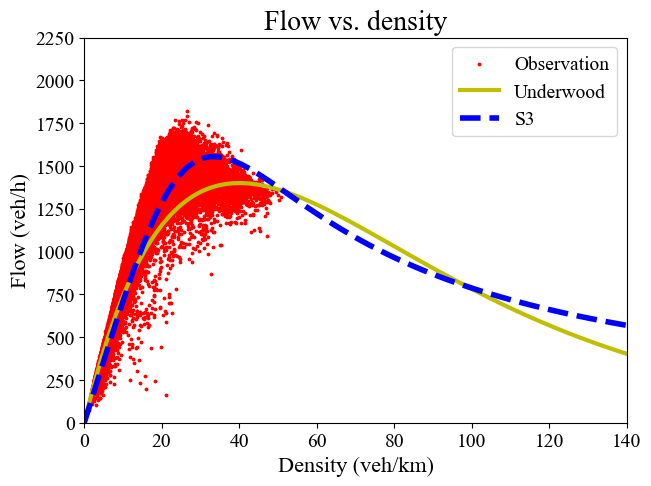

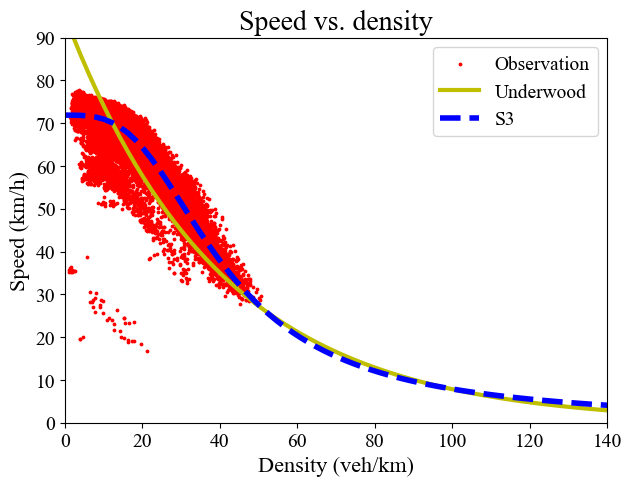

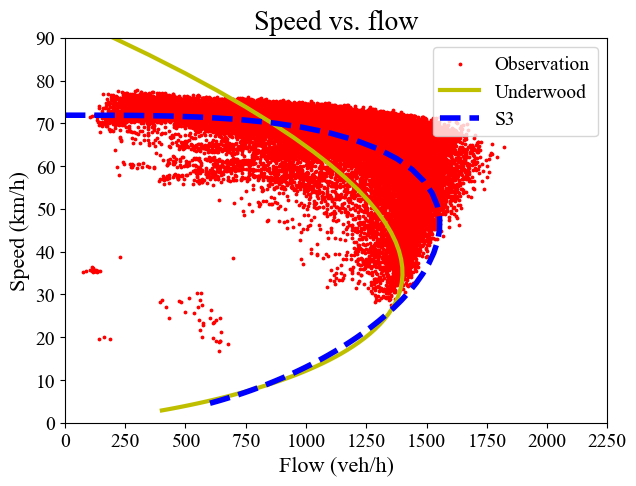

In [47]:
# Step 7.1: compare all models with base model, and plot the result and save to file
model_list_fd = ['Greenshields', 'Greenberg', 'Underwood', 'NF', 'GHR_M1', 'GHR_M2', 'GHR_M3']
solver.plot_fd(solution_dict,
               model_name_list = model_list_fd[2:3],
               base_model_name = "S3",
               output_path = "../examples/Figures_s3" )

INFO Begin to run function: plot_fd_combo …
Greenshields: vf: 84.9825420217912,  kc/kjam: 69.99999999902852

Greenberg: vf: 28.991367220772304,  kc/kjam: 129.3141031390266

S3: vf: 71.8866227431392,  kc/kjam: 33.38462308226176

Info: Successfully saved figures in ../examples/Figures_combo
INFO Finished running function: plot_fd_combo, total: 1s



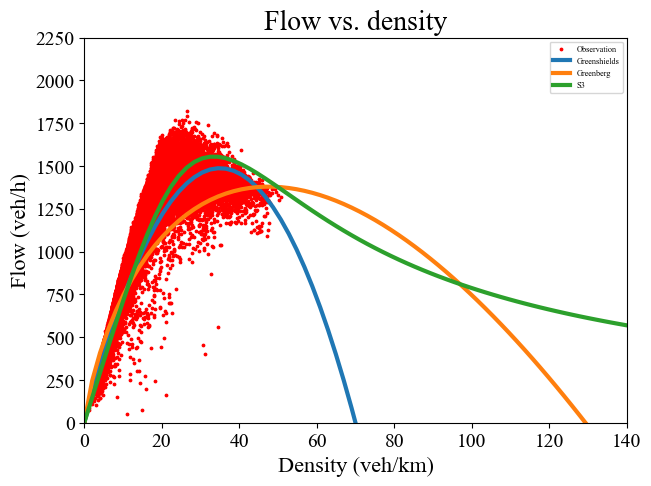

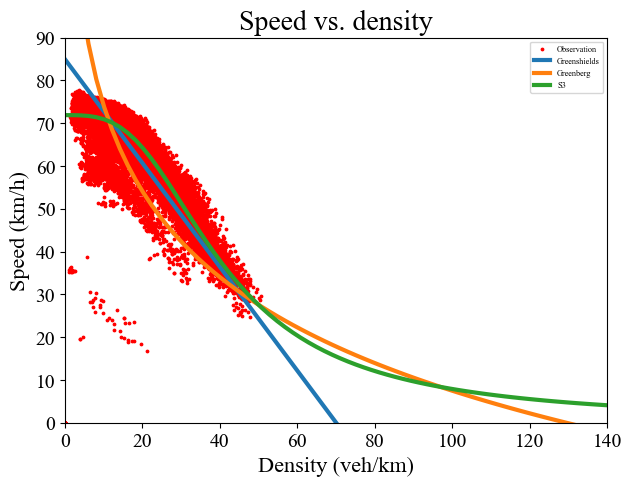

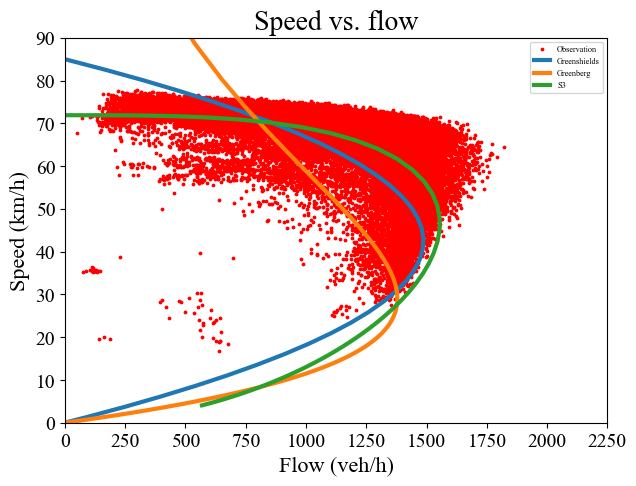

In [53]:
# Step 7.2: plot user defined models in one figure and save to file
# if model_list_combo is [] or None, plat all pre-defined models

model_list_combo = ['Greenshields', 'Greenberg', 'S3']
solver.plot_fd_combo(solution_dict,
                     model_list_combo, 
                     output_path = "../examples/Figures_combo")
